<a href="https://colab.research.google.com/github/PasumurtySowmya/PythonAssignment/blob/main/T2assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import diamonds
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# importing diamond dataset from the library
df = sns.load_dataset('diamonds')
# Step1 Summarize of the dataset
print (df.describe())


              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


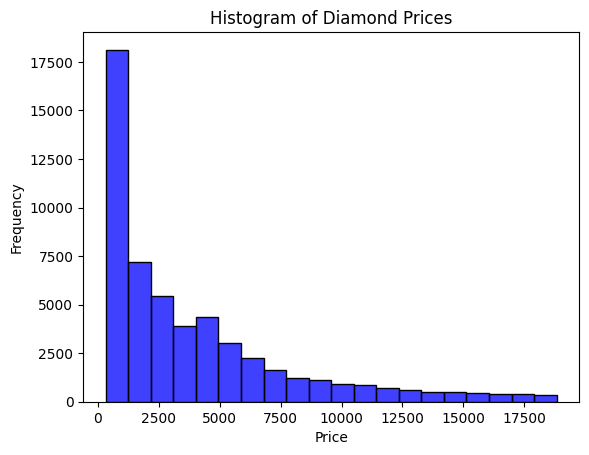

In [ ]:
#2.Visualize distributions of numerical features of Histogram Plot
sns.histplot(data=df, x="price", bins=20, kde=False, color="blue")

# Set labels and title
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Diamond Prices")

# Show the plot
plt.show()

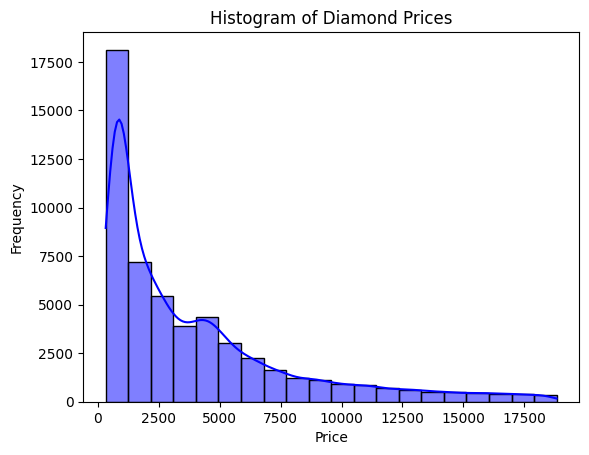

In [ ]:
# Visualization of numerical features of Histogram and Density Plot
sns.histplot(data=df, x="price", bins=20, kde=True, color="blue")

# Set labels and title
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Diamond Prices")

# Show the plot
plt.show()


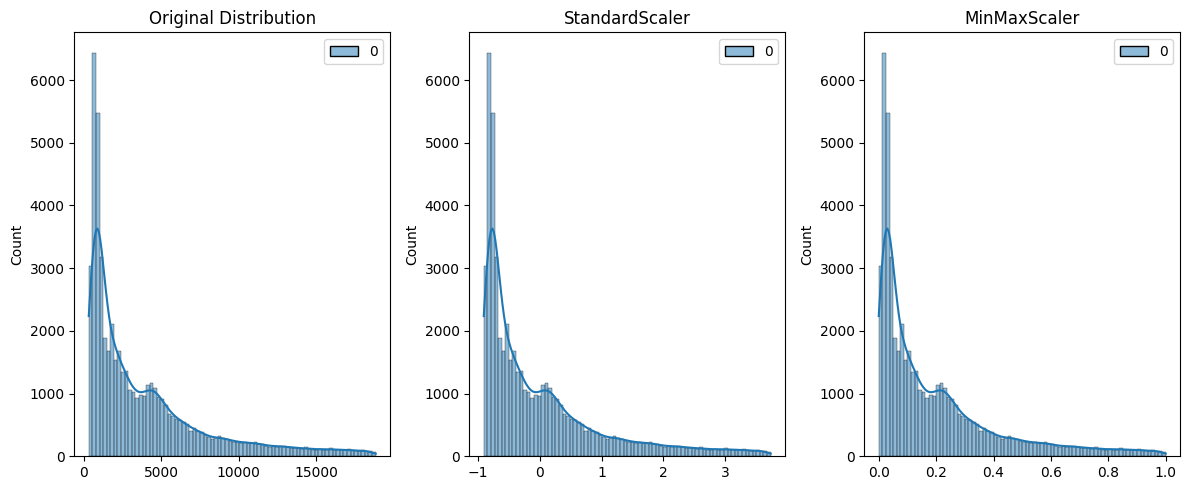

In [ ]:
# 4.Comparing two scaling techniques Standard_scaler and min-max scaler
# Extract the "price" column for visualization
original_prices = df["price"].values.reshape(-1, 1)

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply scaling
scaled_prices_standard = standard_scaler.fit_transform(original_prices)
scaled_prices_minmax = minmax_scaler.fit_transform(original_prices)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(original_prices, kde=True)
plt.title("Original Distribution")

plt.subplot(1, 3, 2)
sns.histplot(scaled_prices_standard, kde=True)
plt.title("StandardScaler")

plt.subplot(1, 3, 3)
sns.histplot(scaled_prices_minmax, kde=True)
plt.title("MinMaxScaler")

plt.tight_layout()
plt.show()


[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


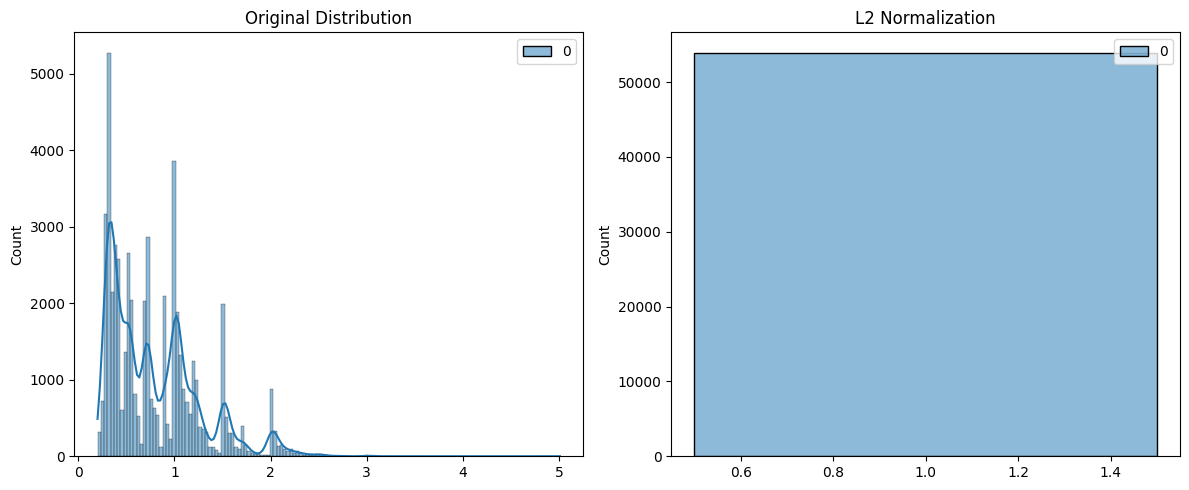

In [ ]:
#Normalize the dataset using L2 normalization
# Extract the "price" column for normalization
carat = diamonds["carat"].values.reshape(-1, 1)

# Apply L2 normalization
normalized_carat = normalize(carat, norm="l2")
print(normalized_carat)
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(carat, kde=True)
plt.title("Original Distribution")

plt.subplot(1, 2, 2)
sns.histplot(normalized_carat, kde=False)
plt.title("L2 Normalization")

plt.tight_layout()
plt.show()


In [8]:
# 6 Spliiting Dataset into training and testing and apply scaling
#import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

# Load the "diamonds" dataset from Seaborn
df = sns.load_dataset("diamonds")

# Select numeric features for scaling
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Split the dataset into features (X) and target (y)
X = df[numeric_features]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)




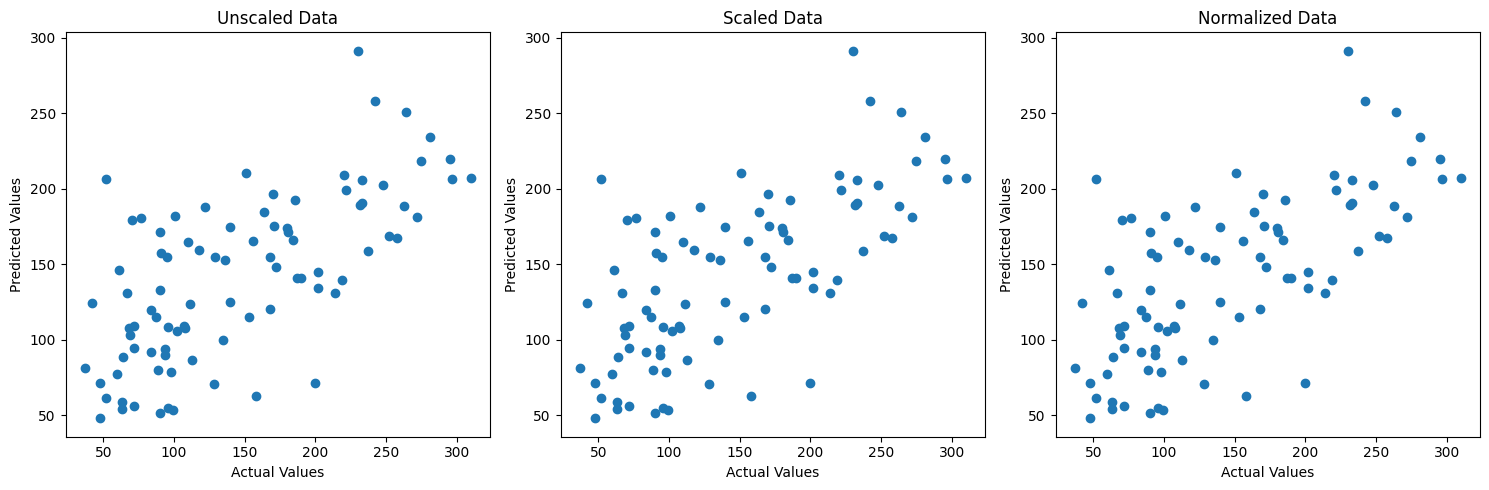

Mean Squared Error (Unscaled Data): 2900.19
Mean Squared Error (Scaled Data): 2900.19
Mean Squared Error (Normalized Data): 2900.19


In [14]:
# 7 Train a simple machine learning model using scaled and normalizationdata .Compare with unscaled data
# Initialize Linear Regression models
unscaled_model = LinearRegression()
scaled_model = LinearRegression()
normalized_model = LinearRegression()

# Train unscaled model
unscaled_model.fit(X_train, y_train)
y_pred_unscaled = unscaled_model.predict(X_test)
mse_unscaled = mean_squared_error(y_test, y_pred_unscaled)

# Apply StandardScaler to the training and testing subsets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaled_model.fit(X_train_scaled, y_train)
y_pred_scaled = scaled_model.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

# Apply MinMaxScaler to the training and testing subsets
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)
normalized_model.fit(X_train_normalized, y_train)
y_pred_normalized = normalized_model.predict(X_test_normalized)
mse_normalized = mean_squared_error(y_test, y_pred_normalized)

# Create scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(y_test, y_pred_unscaled)
plt.title('Unscaled Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(132)
plt.scatter(y_test, y_pred_scaled)
plt.title('Scaled Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(133)
plt.scatter(y_test, y_pred_normalized)
plt.title('Normalized Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

print(f"Mean Squared Error (Unscaled Data): {mse_unscaled:.2f}")
print(f"Mean Squared Error (Scaled Data): {mse_scaled:.2f}")
print(f"Mean Squared Error (Normalized Data): {mse_normalized:.2f}")
